# ASTRO 530 Homework 4 - Olivier Gilbert - Oct 29 2025

## 1.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as cst
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.rc("axes", labelsize=16) 
T_eff = 5800*u.K # K
R_star = 1*cst.R_sun

wav = np.logspace(np.log10(0.05),np.log10(1000),100)*u.um

### a)

We start with a simple 2-component disk model

/opt/anaconda3/envs/astro532/lib/python3.13/site-packages/astropy/units/quantity.py:659: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/bq/dl39th_j0f71bgv_rs5frsgm0000gq/T/ipykernel_71038/3279410453.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wav.value), np.log10((wav*disk1.L_lambda(wav)).value), ls="--", color="blue", lw=2, label="Inner disk")
/var/folders/bq/dl39th_j0f71bgv_rs5frsgm0000gq/T/ipykernel_71038/3279410453.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wav.value), np.log10((wav*disk2.L_lambda(wav)).value), ls="--", color="red", lw=2, label="Outer disk")
/var/folders/bq/dl39th_j0f71bgv_rs5frsgm0000gq/T/ipykernel_71038/3279410453.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wav.value), np.log10((wav*model1.L_lambda(wav)).value), color="purple", lw=2, label="Total disk")


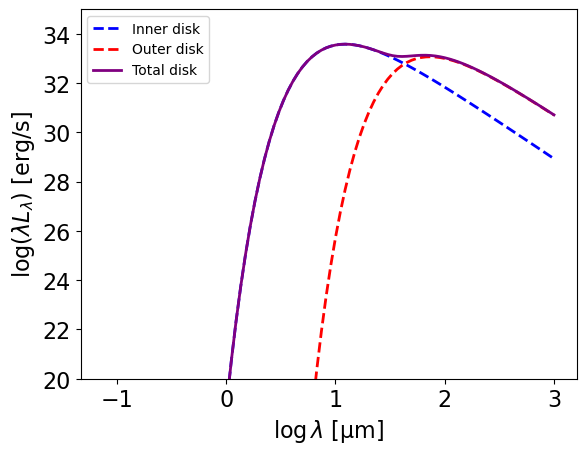

In [40]:
from scipy.integrate import quad
def planck(wav, T):
    return 2*cst.h*cst.c**2*wav**(-5) / (np.exp(cst.h*cst.c/(wav*cst.k_B*T))-1)
class Disk:
    def __init__(self, spatial_extent, Temp):
        self.ri = spatial_extent[0]
        self.rf = spatial_extent[1]
        self.T = Temp
    def temp(self, r): # abstract method for temp
        return (self.T if r <= self.rf and r >= self.ri else 0)
    def L_lambda(self, wav):
        return (planck(wav, self.T) * (2*np.pi*(self.rf**2-self.ri**2))).to(u.erg / u.s / u.um)
    def __add__(self, disk2):
        return Disk2Comp((self.ri,self.rf),(disk2.ri,disk2.rf),self.T,disk2.T)

class Disk2Comp:
    def __init__(self, spatial_extent1, spatial_extent2, T1, T2):
        self.disk1 = Disk(spatial_extent1,T1)
        self.disk2 = Disk(spatial_extent2,T2)
    def L_lambda(self, wav):
        return self.disk1.L_lambda(wav)+self.disk2.L_lambda(wav)

disk1 = Disk((0.1*u.AU,5*u.AU),300*u.K)
disk2 = Disk((5*u.AU,100*u.AU),50*u.K)
model1 = disk1+disk2
plt.plot(np.log10(wav.value), np.log10((wav*disk1.L_lambda(wav)).value), ls="--", color="blue", lw=2, label="Inner disk")
plt.plot(np.log10(wav.value), np.log10((wav*disk2.L_lambda(wav)).value), ls="--", color="red", lw=2, label="Outer disk")
plt.plot(np.log10(wav.value), np.log10((wav*model1.L_lambda(wav)).value), color="purple", lw=2, label="Total disk")
plt.ylim(20, 35)
plt.xlabel(r"$\log \lambda$ [$\mathrm{\mu m}$]")
plt.ylabel(r"$\log (\lambda L_\lambda)$ [$\mathrm{erg/s}$]")
plt.legend()
plt.show()
